<img src="Imgs/faceembedding.jpg" alt="Drawing" width="100%"/>

# How Amazon Prime Video can provide you actors’ information whenever you hit pause during a show?

* [Amazon Prime Video — IMDb and X-Ray](#Amazon Prime Video)
* [Overview — Object Detection and Recognition](#Object Detection and Recognition)
* [Face Detection and Recognition](#Face Detection and Recognition)
    * [Finding all the Faces — Histogram of Oriented Gradients](#Finding all the Faces)
    * [Posing and Projecting Faces — Face Landmark Estimation](#Posing and Projecting Faces)
    * [Encoding Faces — FaceNet: DCNN-based face embedding](#Encoding Faces)
    * [Finding the person’s name from the encoding — SVM](#Finding the person’s name from the encoding)
* [What about Videos?](#What about Videos?)

# <a id='Amazon Prime Video'> Amazon Prime Video </a>

<img src="Imgs/amazonprimevideo.jpg" alt="Drawing" width="100%"/>

It may have started as a perk, but Amazon's streaming video service is becoming a true Netflix competitor now.

Amazon Prime Video is not exactly like other streaming video services. While Netflix and Hulu exist as self-contained platforms, Amazon's content is a benefit which Amazon extends to Prime subscribers to help justify the yearly fee.

But Amazon Prime Video has one feature that neither Netflix or Hulu has.
Have you ever said to yourself *I've seen that face before*, *That actor... is so familiar*, *Wasn't he in that thing? With that gal?*, and yet it's driving you nuts because you cannot place the face?
X-Ray to the rescue.

## IMDb and X-Ray

Did you know Amazon owns **IMDb**? Amazon purchased IMDb, *the* repository of all film/television industry metadata, way back in 1998.

[IMDb](http://www.imdb.com), formerly known as **Internet Movie Database**, is an online database of information related to films, television programs and video games, including cast, production crew, fictional characters, biographies, plot summaries, trivia and reviews, operated by IMDb.com, Inc. .

> As of December 2017, IMDb has approximately **4.7 million titles** ( including episodes ), **8.3 million personalities** in its database, as well as **83 million registered users**.

> The site enables registered users to submit new material and edits to existing entries.
Users with a proven track record of submitting factual data are given instant approval for minor additions such as filming locations. However, character names, plot summaries, and title changes are screened before publication, and usually take between 24-72 hours to appear. Users are also invited to rate any film on a scale of 1 to 10, and the totals are converted into a weighted mean-rating that is displayed beside each title, with online filters employed to deter ballot-stuffing.

We have no way of knowing how much business Amazon has been able to squeeze out of people researching the filmographies of their favorite character actors, but the company has found one centralized hub of synergy: X-Ray.

<img src="Imgs/mrRobot.png" alt="Drawing" width="100%"/>

**X-Ray** is the Prime Video feature, **powered by IMDb**, that feeds viewers with a steady stream of info about the actors, filmmakers, music, and assorted trivia in each scene. It's a sort of live-running commentary of behind-the-scenes factoids.

This Shazam-like service differentiates Amazon from other streaming and content creating competitors by offering information viewers are looking for, without leaving the Amazon ecosystem or using a second screen to find it.

## How does X-Ray work?

Amazon does not make disclosures of the implementation of the tool. 
We do know that the tech giant developed the **Amazon Rekognition API** for the Deep learning-based image and video analysis.

> The [official website](https://aws.amazon.com/rekognition/) states:

> *Amazon Rekognition makes it easy to add image and video analysis to your applications. You just provide an image or video to the Rekognition API, and the service can identify the objects, people, text, scenes, and activities, as well as detect any inappropriate content. Amazon Rekognition also provides highly accurate facial analysis and facial recognition. You can detect, analyze, and compare faces for a wide variety of user verification, cataloging, people counting, and public safety use cases.*

> *Amazon Rekognition is based on the same proven, highly scalable, deep learning technology developed by Amazon’s computer vision scientists to analyze billions of images and videos daily [...]*

Furthermore, **Celebrity recognition** is listed as key feature of the API.

If you look for details on used algorithms, the statement *image detection and recognition is powered by deep learning* is pretty much all you'll get. The piece published on the [AWS News Blog](https://aws.amazon.com/blogs/aws/amazon-rekognition-update-celebrity-recognition/) about the Celebrity Recognition feature suggests connections between the Rekognition API and X-Ray, though, by claming that *the API currently return links to IMDB content*.

Anyway, X-Ray ( released in 2015 ) and the Rekognition API ( released in 2016 ) have never been directly related by Amazon. Nevertheless, the company does surely have both the sources and the means to feed sophisticated machine learning algorithms like facial recognition algorithms. In the next sections, we'll try to guess how.

### Trivia

Observing X-Ray working in real-time as well as reading articles published at the time of its release leads to think that Amazon developers did not stick with a purely algorithmic approach.

[CNBC.com](https://www.cnbc.com/2015/04/13/amazon-launches-x-ray-for-fire-tv-lets-users-search-actors-songs-and-trivia.html),
> *The service allows users to identify songs, actors, trivia in films while they're watching on Amazon Instant Video, as well as skip to specific scenes in real time. It uses a combination of facial and audio recognition as well as human input to fill in any gaps machine learning might miss, and is supported by the comprehensive movie database IMDb for its information.*

[WIRED.com](https://www.wired.com/2015/04/amazon-xray-fire-tv/),
> *Amazon puts a lot of time and energy into X-Ray across all platforms. Its computers can do some of the identification and time-coding, but every movie or TV show has some human touch as well—that's why there are only about 100 titles a week added to X-Ray. It's a lot of work for an ostensibly small feature, but Amazon sees it as a differentiator.*

# <a id='Object Detection and Recognition'> Object Detection and Recognition </a>

<img src="Imgs/goof.png" align="right" width="30%"/> 

You might have seen this famous [xkcd](https://xkcd.com) comic before. The goof is based on the idea that any 3-year-old child can *locate* and *recognize* a bird in a photo, but figuring out how to make a computer recognize objects has puzzled the very best computer scientists for over 50 years. In the last few years, we’ve finally found a good approach to object recognition using *Deep Convolutional Neural Networks*.

Our brains make vision seem easy. It doesn't take any effort for humans to tell apart a lion and a jaguar, read a sign, or recognize a human's face. But these are actually hard problems to solve with a computer: they only seem easy because our brains are incredibly good at understanding images, and faces in particular. So good that we even end up seeing faces in everyday objects, like cars!

Let's begin to understand the problem by noting that we usually mix up two very different actions while talking about vision:

* **Object Detection**, answering the question * **Where** is that specific object?*
* **Object Recognition**, answering the question * **What** is that object?*

Let's give proper definitions:

> Object Detection is a computer technology related to computer vision and image processing that deals with *detecting instances of semantic objects of a certain class* ( such as humans, buildings, or cars ) in digital images and videos.

> Object Recognition ( aka Object Classification ) is a computer technology related to computer vision and image processing that deals with *taking an input image and **outputting a class** ( a cat, dog, etc ) **or a probability of classes** that best describes the image.*

# <a id='Face Detection and Recognition'> Face Detection and Recognition </a>

Translating the Object Detection and Recognition problems into specific problems related to faces is straightforward:

* **Face Detection** answers the question * **Where** are faces?*
* **Face Recognition** answers the question * **Whose** is that face?*

Solving them is much less easy. Computers are not capable of this kind of high-level generalization ( at least not yet… ), so we have to teach them how to achieve complex structures by means of sequences of simple steps.

<img style="float:left;margin:0px 45px 0px 0px" width="45%" src="Imgs/personOfInterest.gif"/>

1. Look at a picture and find all the faces in it

2. Focus on each face and be able to understand that even if a face is turned in a weird direction or in bad lighting, it is still the same person

3. Be able to pick out unique features of the face that you can use to tell it apart from other people

4. Compare the unique features of that face to all the people you already know to determine the person’s name

As a human, your brain is wired to do all of this automatically and instantly.
We need to build a *pipeline* where we solve each step of face recognition separately and pass the result of the current step to the next step. In other words, we will chain together several machine learning algorithms.

Before starting with the maths.. You know Root, right? She is one of the main characters of the TV show [_Person of Interest_](http://www.imdb.com/title/tt1839578/?ref_=nv_sr_1), and she'll be with us for all the lesson.

## <a id='Finding all the Faces'> Step 1: Finding all the Faces</a>
 
The first step in our pipeline is Face Detection. Obviously we need to locate the faces in a image before we can try to tell them apart!

If you’ve used any camera in the last 10 years, you’ve probably seen face detection in action:

<img src="Imgs/Camera.png" width="70%"/> 

Face detection is a great feature for cameras. When the camera can automatically pick out faces, it can make sure that all the faces are in focus before it takes the picture.
 
Face detection went mainstream in the early 2000's when [Paul Viola and Michael Jones](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf) invented a way to detect faces that was fast enough to run on cheap cameras. However, much more reliable solutions exist now. We’re going to use a method invented in 2005 called Histogram of Oriented Gradients.

### Histogram of Oriented Gradients
 
Even though the **Histogram of Oriented Gradients ( HOG ) descriptor** for object detection is more than a decade old, it is still heavily used today — and with fantastic results.

The HOG method was suggested by Dalal and Triggs in their seminal 2005 paper [Histogram of Oriented Gradients for Human Detection](https://courses.engr.illinois.edu/ece420/fa2017/hog_for_human_detection.pdf). The researches demonstrated that the HOG image descriptor and a **Linear Support Vector Machine ( SVM )** could be used to train highly accurate object classifiers — or in their particular study, human detectors.
 
The developed object detector was trained according to the **hard-negative mining** approach: the SVM classifier is trained multiple times on hard-negative samples of HOG descriptors of images.

> An HOG descriptor is a **feature descriptor**, i.e. a representation of an image or an image patch that simplifies the image by extracting useful information and throwing away extraneous information. 
Typically, a feature descriptor converts an image of size *width x height x 3 ( channels )* to a feature vector — an array of length $n$.

> We know that edges and corners pack in a lot more information about object shape than flat regions. That's why gradients ( derivatives with respect to $x$ and $y$ ) of an image are so useful: the magnitude of gradients is large around edges and corners, which are regions of abrupt intensity changes.
The HOG method uses as features the distribution ( histograms ) of directions of gradients ( "oriented gradients" ).
Technically, we say that *the HOG method is based on evaluating well-normalized local histograms of image gradient orientations in a dense grid.*

First of all, let's see how to extract HOG descriptors from image samples. Second, we'll detail the main steps for training an object detector using HOG.

#### How to extract HOG descriptors from an image

<img src="Imgs/Step1.png" style="float:right;margin:10px -5px 0px 25px" width="45%"/>

    1. Colour Normalization 
> To find faces in an image, we’ll start by making our image black and white because we don’t need color data to find faces.

    2. Gradient Computation
> If we analyze pixels directly, really dark images and really light images of the same person will have totally different pixel values.
> But by considering only the *direction* that brightness changes, both *really dark images and really bright images will end up with the same exact representation*.

> Our goal is to figure out how dark the current pixel is compared to the pixels directly 
surrounding it in order to **get the flow from light to dark across the entire image**. 
Replacing pixels with gradients is like drawing arrows showing in which direction the image is getting darker.

> Hence, to calculate a HOG descriptor, we need to first calculate the gradient at each pixel of the image.
> We can easily get the horizontal and vertical discrete derivatives ( $g_x$ and $g_y$ respectively ) by filtering the **image with 1-D masks $[-1,0,1]$**.
> Thereafter, we compute the magnitude $g = \sqrt{g_x^2 + g_y^2}$ and the orientation $\theta = atan{\ \frac{g_y}{g_x} }$ of each gradient. Now, each pixel is given with tuple $(g, \theta)$.

    3. Orientation Binning — Computation of 
       Histograms of Oriented Gradients
> Saving the gradient for every single pixel gives us way too much detail. We'd end up missing the forest for the trees.
For each **local spatial region**, we’ll count up how many gradients point in each major direction ( how many point up, point up-right, point right, etc… ); then we’ll save only the arrow directions that were the strongest. Finally, we'll be able to see the basic pattern of the image.
Let's see how we can achieve that.

> The image is divided into $c$×$c$ **cells** and a *histogram of gradients* is calculated for each one of them. The dimension $c$ of the cell must be big enough to capture interesting features ( e.g. eyes, nose, lips, jaw ): it depends on the dimension of the detection window.

> The histogram is essentially a vector ( or an array ) of $b$ bins corresponding to angle
values taken by gradient directions. The histogram channels are spread over 0−180 or 0−360.
When the angles are considered between 0 and 180 degrees instead of 0 to 360 degrees, 
they are called **“unsigned” gradients** because a gradient arrow and the one 180 degrees opposite to it are considered the same ( in terms of direction ) since represented by the same orientation numbers.
Empirically, one choice might be better than the other.

> Let's see how the histogram is built considering the optimal parameters found for the pedestrian detection — original paper study: $b$ is set to 9, channels are spread over 0−180.
A bin is selected based on the direction, and the vote ( the value that goes into the bin ) is selected based on the magnitude.

> This step is the fundamental **non-linearity** of the descriptor, and **makes the image representation much less sensitive to noise**.

> We make this process for each cell, then we'll have one **HOG descriptor** ( a vector of length $b$ ) for each image patch.
    
    4. Normalization and Block Descriptor
> Gradient strenghts ( magnitude ) vary over a wide range owing to local variations in illumination and foreground-background contrast, so **effective local contrast normalization turns out to be essential for good performance**.

> Ideally, we want our descriptor to be independent of lighting variations. To get that, we normalize the HOG descriptor of each cell.
We obtain better results if we **normalize each vector over a bigger sized block**. In the paper, 4 cells are grouped into 1 blocks. 
Concatenate the 4 $b$-HOG descriptors and normalize that vector: the result is the **locally normalized HOG descriptor** of the considered block.
Tipically, we overlap the blocks so that each cell response contributes to several components of the final image descriptor vector, each normalized with respect to a different block.

    5. Calculate the HOG feature vector
> To calculate the final feature vector for the entire image, the 4x$b$-vectors are concatenated into one giant vector.

> ** What is the length of the final vector? **
Let ($l$, $m$) be the dimension of the image. Let ($2c$, $2c$) be the dimension of each block. Each $2c$×$2c$ block is moved in steps of $c$ ( 50% overlap with the previous block ). Then the length of the final vector is given by $(\frac{l}{c} - 1) \ (\frac{m}{c} - 1) \ 4b$.
In the paper, (64, 128) is the image size and $c = 8$. Hence, the length of the image HOG feature is $7 * 15 * 4 * 9 = 3780$.

> Unfortunately, there is no easy way to visualize the HOG descriptor in Python.

To find faces in the "HOG image" ( i.e. the HOG feature vector representing the image object ), all we have to do is *find the part of our image that looks the most similar to a known HOG pattern that was extracted from a bunch of other training faces.*

#### Training and Evaluation of the Face Detector using the HOG feature as image descriptor

    1. Sampling positive images
> Sample $P$ positive samples from your training data of the object(s) you want to detect ( faces in case of face detection ) and extract HOG descriptors from these samples.

    2. Sampling negative images
> Sample $N$ negative samples from a negative training set that does not contain any of the objects you want to detect ( i.e. any faces ) and extract HOG descriptors from these samples as well. In practice $N >> P$.

    3. Training a Linear SVM
> Train a Linear [SVM classifier](https://en.wikipedia.org/wiki/Support_vector_machine) on your positive and negative samples.

    4. Performing hard-negative mining 
> For each image and **each possible scale of each image in your negative training set**, apply the **sliding window technique**. Slide your window across the image: at each window compute your HOG descriptors and apply your classifier. If your classifier ( incorrectly ) classifies a given window as an object ( and it will, there will absolutely be false-positives ), record the feature vector associated with the false-positive patch along with the probability of the classification. This approach is called **hard-negative mining**.

    5. Re-training your Linear SVM using the hard-negative samples
> Take the false-positive samples found during the hard-negative mining stage, sort them by their confidence ( i.e. probability ) and re-train your classifier using these hard-negative samples. ( Note: You can iteratively apply steps 4-5, but in practice one stage of hard-negative mining usually [ not not always ] tends to be enough. The gains in accuracy on subsequent runs of hard-negative mining tend to be minimal. )

    6. Evaluating your classifier on your test dataset
> Your classifier is now trained and can be applied to your test dataset. Again, just like in Step 4, for each image in your test set, and for each scale of the image, apply the sliding window technique. At each window extract HOG descriptors and apply your classifier. If your classifier detects an object with sufficiently large probability, record the bounding box of the window. After you have finished scanning the image, apply [**non-maximum suppression**](https://www.pyimagesearch.com/2015/02/16/faster-non-maximum-suppression-python/) to **remove redundant and overlapping bounding boxes**.

Please note that HOG descriptors are **not tied** to a specific machine learning algorithm.

### > Python code 

Here's the Python code detecting the faces in a given image by the Locally normalized HOG method. The **`dlib`** Python library is used.

> Developed by Davis King, the `dlib` C++ library is a cross-platform package for threading, networking, numerical operations, machine learning, computer vision, and compression, placing a strong emphasis on extremely high-quality and portable code.

> From a computer vision perspective, `dlib` has a number of state-of-the-art implementations, including:
* Facial landmark detection
* Correlation tracking
* Deep metric learning

> To install the `dlib` library and its four primary prerequisites on your Ubuntu or macOS machine, follow the steps described on the website page https://www.pyimagesearch.com/2017/03/27/how-to-install-dlib/ .

In [1]:
# Load the libraries
import dlib
import cv2

In [2]:
# Create a HOG face detector using the built-in dlib class
face_detector = dlib.get_frontal_face_detector()

In [3]:
# Open a window on the desktop showing the HOG detector’s filters
win = dlib.image_window()
win.set_image(face_detector)

In [4]:
# Load the image into an array
file_name = "Imgs/Root.jpg"
image = cv2.imread(file_name)
print image.shape

(338, 602, 3)


In [5]:
# Open a window on the desktop showing the image
win = dlib.image_window()
win.set_image(image)

In [6]:
# Run the HOG face detector on the image data:
# the result will be the bounding boxes of the faces in our image

# The 1 as second argument indicates that we should upsample the image 1 time:
# this will make everything bigger and allow us to detect more faces
detected_faces = face_detector(image, 1)

print("I found {} faces in the file {}".format(len(detected_faces), file_name))

I found 1 faces in the file Imgs/Root.jpg


In [7]:
print detected_faces[0]
print detected_faces[0].left()

[(77, 15) (262, 201)]
77


In [8]:
# Loop through each face we found in the image and overlay a rectangle on it
image = cv2.imread(file_name)
win = dlib.image_window()
for i, face_rect in enumerate(detected_faces):
    
    # detected faces are returned as an object with the coordinates 
    # of the top, left, right and bottom edges
    x = face_rect.left()
    y = face_rect.top()
    w = face_rect.right() - x
    h = face_rect.bottom() - y
    print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".
          format(i, x, y, face_rect.right(), face_rect.bottom()))
    
    # draw a box around each face we found
    win.add_overlay(face_rect, color=dlib.rgb_pixel(255, 0, 0))
    # cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 1)
    cv2.putText(image, "Face #{}".format(i), (x, y - 3),
                cv2.FONT_ITALIC, 0.5, (255, 0, 0), 1)

# plot the modified image
win.set_image(image)

- Face #0 found at Left: 77 Top: 15 Right: 262 Bottom: 201


<img src="Imgs/Root_facedetected.png" width="50%"/>

## <a id='Posing and Projecting Faces'> Step 2: Posing and Projecting Faces </a>

To a computer, the same face looks totally different when turned. We'll take into account this issue by warping each picture so that the eyes and lips are always in the same place in the image.

<img src="Imgs/Root_poses.png" width="70%"/>

To do that, we need to know *where* the eyes and mouth are. Then, we’ll simply rotate, scale and shear the image so that the eyes and mouth are centered according to the bounding box output of the face detector.

> We won’t do any fancy 3D warps because that would introduce distortions into the image, but **affine transformations**.

### Face Landmark Estimation

<img src="Imgs/landmarked_face.png" style="float:right;margin:5px 0px 20px 40px" width="40%"/>

Once you have a bounding box around the face — output of the face detection phase, the obvious research problem is to see if you can find the location of different facial features accurately. _Facial Feature Detection_ is also referred to as **_Facial Landmark Detection_**, _Facial Keypoint Detection_ and **_Face Alignment_** in the literature.

There are a variety of facial landmark detectors, but all methods essentially try to localize and label the following facial regions:

* Mouth
* Right eyebrow
* Left eyebrow
* Right eye
* Left eye
* Nose
* Jaw

There are several applications of keypoint detection in human faces. A few of them are listed below.
<img src="Imgs/virtualmakeup.jpg" style="float:right;margin:-5px 0px 20px 40px" width="40%"/>

* **_Face Recognition_**
Facial landmarks can be used to align facial images to an intermediary ( mean ) face shape so that the location of the facial landmarks in all images are approximately the same after the alignment.
* **_Male/Female Distinction_**
Landmark Detection can be utilized to distinguish between male and female faces since the distribution of all landmarks is typical for male and female face.
* **_Facial Expression Distinction_**
* **_Head Pose Estimation_**
* **_Face Morphing_**
Facial landmarks can be used to align faces that can then be morphed to produce in-between images.
* **_Virtual Makeover_**
The detected landmarks can be used to the calculate contours of the mouth, eyes etc. to render makeup virtually.
* **_Face Replacement_**
If facial feature points estimations on two faces are present, it is possible to align one face on the other one, and seamlessly clone one face onto the other one.

### Face Landmark Detector

The [facial landmark detector included in the `dlib` library](http://blog.dlib.net/2014/08/real-time-face-pose-estimation.html) is an implementation of the [One Millisecond Face Alignment with an Ensemble of Regression Trees](http://www.csc.kth.se/~vahidk/papers/KazemiCVPR14.pdf) paper by Kazemi and Sullivan ( 2014 ).

> The method uses a training set composed of labeled facial landmarks on an image. These images are manually labeled, specifying $(x, y)$-coordinates of each facial region.

> An **Ensemble of Regression Trees** is trained to estimate the facial landmark positions on a new image directly from the pixel intensities themselves. In fact, no complex feature extraction takes place.

> More precisely, 
* Facial alignment problem is solved with a **cascade of regression functions**.
The shape is initially chosen as the **mean shape** of the training data centered and scaled according to the bounding box output of the face detector.
An iterative approach ( the cascade ) leads to the result: _each regression function in the cascade estimates an **updated shape**_ from the current estimate and the intensities of a sparse set of pixels picked up from the image "near" the current shape estimate. The authors say that pixels are picked up and _indexed relative to the initial estimate_.
* During the training phase, each regression function is computed via **Gradient Tree Boosting**.

#### How the Face Landmark Detector works  —  The Cascade of Regressors

    0. Notation
> * Let $\mathbf{x}_l \in \mathbb{R}^2$ be the $(x, y)$-coordinates of the $l$-th facial landmark in an image $I$. 
* Then, the vector $\mathbf{S} = [\mathbf{x}_1^T, \mathbf{x}_2^T, \dots, \mathbf{x}_L^T]^T = [x_1, y_1, x_2, y_2, \dots, x_L, y_L]^T \in \mathbb{R}^{2L}$ denotes the coordinates of all the $L$ facial landmarks in $I$. We'll refer to the vector $\mathbf{S}$ as _the shape_.
* We use $\widehat{\mathbf{S}}^{(t)}$ to denote our current estimate of $\mathbf{S}$.
* $r_t(.,.)$ is the regressor at the stage $t$ of the cascade.

    1. Setting the initial shape
> The initial shape can simply be chosen as the mean shape of the training data centered and scaled according to the bounding box output of a generic face detector.
    
    2. Updating the initial shape via iterative approach  
> For $t = 1, \dots, T$, the regression function $r_t(.,.)$ predicts an update vector from the image itself and $\widehat{\mathbf{S}}^{(t)}$ that is added to the current shape estimate $\widehat{\mathbf{S}}^{(t)}$ to improve the estimate:

> $$ \widehat{\mathbf{S}}^{(t+1)} = \widehat{\mathbf{S}}^{(t)} + r_t(I, \ \widehat{\mathbf{S}}^{(t)})$$

<img src="Imgs/cascade_alg.jpg" width="100%"/>

Hence, regression functions $r_t(.,.)$ are the model parameter to be learnt.

To train each $r_t(.,.)$ we use the Gradient Tree Boosting algorithm with a sum of square error loss.

> The **Gradient Tree Boosting** is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an **ensemble of weak prediction models**, namely **decision trees**.

> It builds the model in a **stage-wise fashion** like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

####  Model Training  —  Learning each regressor in the cascade

    1. Initializing tuples of images and guessed shapes
> Let $(I_1, \mathbf{S}_1), \dots, (I_n, \mathbf{S}_n)$ be the training data where each $I_j$ is a face image and $\mathbf{S}_j \in \mathbb{R}^L$ its shape vector, $j = 1, \dots, n$.

> The training set used to learn the very first regression function $\mathbf{r}_0$ is composed of **triplets $(i, \widehat{\mathbf{S}}_i^{(0)}, \Delta \mathbf{S}_i^{(0)})$**. Respectively,

> * $ \ \quad\quad \ i \in \{1, \dots, n\} \quad\quad\quad \ $ is the index of the considered face image
> * $ \quad {\widehat{\mathbf{S}}}_i^{(0)} \in \{\mathbf{S}_1, \dots, \mathbf{S}_n\} \setminus \mathbf{S_i} \quad $ is the initial shape estimate
> * $ \ \quad\quad \Delta \mathbf{S}_i^{(0)} = \mathbf{S}_i - \widehat{\mathbf{S}}_i^{(0)} \quad\quad \ $ is the target update step

> for $i = 1, \dots, N$. 

> The total number of these triplets is $N = nR$ where $R$ is the number of initializations used for each image $I_j$. Each initial shape estimate for an image is sampled uniformly from $\{\mathbf{S}_1, \dots, \mathbf{S}_n\}$ without replacement.
    
    2. Computing the very first regression function
> <img src="Imgs/gradienttreeboosting_alg.png" style="float:right;margin:6px -20px 10px 0px" width="53%"/>
The gradient tree boosting algorithm is applied to the pool of update steps $\{ \Delta \mathbf{S}_i^{(0)} \}_{i=1:N}$. A square error loss is used and the residuals computed in the innermost loop ( 2.a ) correspond to the gradient of this loss function evaluated at each training sample.

> You can picture the gradient boosting algorithm as an iterative approach: from an initial guess, the result is got via adjustments.
Those adjustments are given by weak regression functions output of the training process of regression trees.

> Hence, at each step ( 2.b ) of this iterative approach, a **multi-target regression tree** is fitted:

> * Shape updates $\mathbf{r}_i \in \mathbb{R}^L$ are the targets
> * Pairwise differences of $P$ pixels indexed relative to the current shape estimate are the features

> Performing **regularization** is fundamental in order to avoid overfitting.
The simplest approach is shrinkage ( 2.c ), but regularization can also be achieved by averaging the predictions of multiple regression trees. 

> <img src="Imgs/Step2A.png" style="float:right;margin:5px -70px 0px 0px" width="63%"/>

    2.A few more words on the training of each Regression Tree — Shape Indexed Feature
> The features for learning the weak learner $ g_k$ depend on both image and previous estimated shape.

> It improves the performance by achieving **geometric invariance**. In fact, extracting features relative to $\widehat{\mathbf{S}}^{(t)}$ leads to eliminate two kinds of variations:

> * scale, rotation, and translation
> * identity, pose, and expression 

> Let's see how to compute these features.

> For efficient regression, simple pixel-differences are considered, i.e., each column of the feature matrix is the intensity difference of two pixels in the image.
Only $P$ points on the image are selected.

> Specifically, $P$ landmarks are randomly chosen and used as center of a **local coordinate system**. For each selected landmark, a point on the image is chosen according to a randomly position with respect to the local coordinate system. Therefore, for each image, $P$ pixels ( evaluations of these selected points ) are collected.
An $N \times P$ matrix can be built by stacking the gathered row vectors $\in \mathbb{R}^P$.
Finally, the feature matrix is composed of $P^2$ columns containing the pairwise difference of all the columns of that matrix.

> This process enables us sampling more useful candidate **features distributed around salient landmarks**.

> The drawback of using pixel differences is that the number of potential split ( feature ) candidates becomes quadratic in the number of pixels, when training the regression tree.
To deal with this problem, an **exponential prior** $\mathbb{P}$ over distances between the pixels used in a split to encourage closer pixel pairs to be chosen.

> At each node, $E$ different features ( i.e. columns of the feature matrix, i.e. differences between two pixels ) are selected to produce the split: the split optimizing the objective is chosen.

    3. Updating the training tuplets to compute the next regressor
> The set of training triplets is then updated to provide the training data $(i, \widehat{\mathbf{S}}_i^{(1)}, \Delta \mathbf{S}_i^{(1)})$ for the next regressor $\mathbf{r}_1$ by setting ( with $t = 0$ ):

> $$ {\widehat{\mathbf{S}}}_i^{(t+1)} = {\widehat{\mathbf{S}}}_i^{(t)} + r_t(I_i, \ {\widehat{\mathbf{S}}}_i^{(t)}) $$

> $$ \Delta \mathbf{S}_i^{(t+1)} = \mathbf{S}_i - \widehat{\mathbf{S}}_i^{(t+1)} $$
    
    4. Iterating the process
> This process is iterated until a cascade of $T$ regressors $\mathbf{r}_0, \mathbf{r}_1, \dots, \mathbf{r}_{T-1}$ are learnt which when combined give a sufficient level of accuracy.

### > Python code 

<img src="Imgs/facial_landmarks_68markup.jpg" style="float:right;margin:-10px 0px 0px 25px" width="48%"/>

The pre-trained facial landmark detector inside the **`dlib`** Python library is used to estimate the location of **68 $(x, y)$-coordinates mapping the facial structure**.

The image displays the 68 facial landmark coordinates from the [iBUG 300-W dataset](https://ibug.doc.ic.ac.uk/resources/300-W_IMAVIS/).
Other flavors of facial landmark detectors exist, including the 194 point model that can be trained on the [HELEN dataset](http://www.ifp.illinois.edu/~vuongle2/helen/).

[**`OpenFace`** package](http://openface-api.readthedocs.io/en/latest/openface.html) is used to warp images. 
In particular, the **`openface.AlignDlib`** class enables the face alignment preprocess. Faces are resized to the same size and transformed to make landmarks appear at the same location on every image. *Now, faces are suitable as inputs of a neural network.*

Let's take a look at the code.

In [9]:
# Load the libraries
import dlib
import cv2

# Load the image into an array
file_name = "Imgs/Root.jpg"
image = cv2.imread(file_name)

In [10]:
# Create a HOG face detector
face_detector = dlib.get_frontal_face_detector()

# run the HOG face detector on the image data
detected_faces = face_detector(image, 1)

In [11]:
# Create the face landmark estimator

# you can download the required pre-trained shape predictor model here:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor_model = "models/shape_predictor_68_face_landmarks.dat"

# face landmark estimator
face_pose_predictor = dlib.shape_predictor(predictor_model)

In [12]:
# Loop through each face we found in the image and 
# overlay a rectangle and the landmarks on it
image = cv2.imread(file_name)
win = dlib.image_window()
for i, face_rect in enumerate(detected_faces):
    
    # draw a box around each face we found    
    win.add_overlay(face_rect, color=dlib.rgb_pixel(255, 0, 0))
    cv2.putText(image, "Face #{}".format(i), (face_rect.left(), face_rect.top() - 3),
                cv2.FONT_ITALIC, 0.5, (255, 0, 0), 1)
    
    # get the the face's pose, i.e. the landmarks
    pose_landmarks = face_pose_predictor(image, face_rect)
    
    # overlay the landmarks on the detected face
    win.add_overlay(pose_landmarks, color=dlib.rgb_pixel(0, 0, 255))

# plot the modified image
win.set_image(image)

<img src="Imgs/Root_landmarksdetected.png" width="50%"/>

In [13]:
# Load the OpenFace library
import openface

In [14]:
# Create the face projector
face_aligner = openface.AlignDlib(predictor_model)

> * **`align(imgDim, rgbImg, bb=None, landmarks=None, landmarkIndices=INNER_EYES_AND_BOTTOM_LIP)`** applied to an **`openface.AlignDlib`** object  transform and align a face in an image.

> **Parameters**:
* **`imgDim`** `(int)` The edge length in pixels of the square the image is resized to.
* **`rgbImg`** `(numpy.ndarray)` RGB image to process. Shape: (height, width, 3)
* **`bb`** `(dlib.rectangle)` Bounding box around the face to align. Defaults to the largest face.
* **`landmarks`** `(list of (x,y) tuples)` Detected landmark locations. Landmarks found on bb if not provided.
* **`landmarkIndices`** `(list of ints)` The indices to transform to.
* **`skipMulti`** `(bool)` Skip image if more than one face detected.

> **Returns**: The aligned RGB image. Shape: `(imgDim, imgDim, 3)`

> **Return type**: `numpy.ndarray`

In [15]:
# Loop through each face we found in the image and 
# overlay a rectangle and the landmarks on it
image = cv2.imread(file_name)
win = dlib.image_window()
for i, face_rect in enumerate(detected_faces):
   
    # use openface to calculate and perform the face alignment
    alignedFace = face_aligner.align(534, image, face_rect, 
                                     landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
    # save the aligned face to a file
    cv2.imwrite("aligned_face_{}.jpg".format(i), alignedFace)

# plot the modified image
win.set_image(alignedFace)

<img src="Imgs/Root_alignedface.png" width="25%"/>

In [16]:
## Alternative to OpenFace

# Load the FaceAligner function
import imutils
from imutils.face_utils import FaceAligner

# Create the face projector
fa = FaceAligner(face_pose_predictor, desiredFaceWidth=256)

# Loop through each face we found in the image and 
# overlay a rectangle and the landmarks on it
image = cv2.imread(file_name)
image = imutils.resize(image, width=800)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detected_faces = face_detector(gray, 2)

win = dlib.image_window()
for i, face_rect in enumerate(detected_faces):
    
    # use openface to calculate and perform the face alignment
    alignedFace = fa.align(image, gray, face_rect)
    # save the aligned face to a file
    cv2.imwrite("aligned_face_{}.jpg".format(i), alignedFace)

# plot the modified image
win.set_image(alignedFace)

## <a id='Encoding Faces'> Step 3: Encoding Faces </a>

<img src="Imgs/fewcharact.png" width="30%"/>

Encoding Faces is the core phase of the face recognition process. It enables to actually tell faces apart.

What we need is a way to extract a **few basic measurements** from each face. Then we could label an unknown face by finding the known face with the closest measurements.

Which measurements should we collect from each face to build our known face database? Ear size? Nose length? Eye color? Something else?
It turns out that the measurements that seem obvious to humans ( like eye color ) don’t really make sense to a computer looking at individual pixels in an image. 
Instead, **the most accurate approach is to let the computer figure out the measurements to collect itself**.

> Deep learning does a better job than humans at figuring out which parts of a face are important to measure.

> A **Deep Convolutional Neural Network ( DCNN )** can learn to reliably generate **128 measurements** for each person, so that any ten different pictures of the same person should give roughly the same measurements.
Basically, *face images are mapped into a vector space*: in literature, this process is referred to as **embedding face images**.

### FaceNet: DCNN-based Face Embedding

**FaceNet** is a unified system for *face verification* ( Is this the same person? ), *face recognition* ( Who is this person? ) and *face clustering* ( Find common people among these faces ) presented in 2015 by researchers from Google in the paper [FaceNet: A Unified Embedding for Face Recognition and Clustering](https://www.cv-foundation.org/openaccess/content_cvpr_2015/app/1A_089.pdf).

On the widely used [Labeled Faces in the Wild (LFW) dataset](http://vis-www.cs.umass.edu/lfw/), the system achieves an accuracy of 99.63%. On YouTube Faces DB it achieves 95.12%.

> The FaceNet method directly learns a mapping from face images to a compact Euclidean space where distances directly correspond to a measure of face similarity.

> Once this space has been produced, the afore-mentioned tasks can be easily implemented using standard techniques with **FaceNet embeddings as feature vectors**. 
Precisely, face verification simply involves thresholding the distance between the two embeddings; recognition becomes a k-NN classification problem; and clustering can be achieved using off-the-shelf techniques such as k-means or agglomerative clustering.

#### The Model Structure

<img src="Imgs/croppedfaces.jpg" alt="title" style="float:right;margin:0px 0px 30px 33px" width="49%"/>

The approach is a purely data driven method which learns its representation **directly from the pixels** of the face. 
Rather than using engineered features, a large dataset of labelled faces is used to attain the appropriate invariances to pose, illumination, and other variational conditions. 
The thumbnails are tight crops of the face area, no 2D or 3D alignment, other than scale and translation is performed.

<img src="Imgs/FaceNet_model.png" alt="title" style="float:right;margin:-13px -5px 30px 5px" width="53%"/>

For each image, a **Euclidean embedding** is learnt using a deep convolutional network. We'll see the details in a moment, think of it as a black box for now.

<img src="Imgs/FaceNet_tripletloss.png" style="float:right;margin:-17px -5px 0px 5px" width="53%"/>

> The network is trained such that the squared $L_2$ distances in the embedding space directly correspond to face similarity: *faces of the same person have small distances and faces of distinct people have large distances*.

<img src="Imgs/googlenet.png" style="float:right;margin:10px -20px 90px 10px" width="54%"/>

FaceNet directly trains its output to be a compact 128-D embedding using a **triplet-based loss function**. 
Triplets consist of two matching face thumbnails and a non-matching face thumbnail and the loss aims to separate the positive pair from the negative by a distance margin.


#### The Triplet Loss Funciton

The triplet loss directly reflects what we want to achieve in face verification, recognition and clustering.

Namely, we strive for an embedding $f(I)$, from an image $I$ into a feature space $\mathbb{R}^d$, such that the squared distance between *all* faces, independent of imaging conditions, of the same identity is small, whereas the squared distance between a pair of face images from different identities is large.

Hence, we want to ensure that an image $I_i^a$ ( _anchor_ ) of a specific person is closer to all other images $I_i^p$ ( _positive_ ) of the same person than it is to any image $I_i^n$ ( _negative_ ) of any other person.
The loss that is being minimized is then:

$$ \sum_j{\bigl[ {\lVert \ f(I_j^a) - f(I_j^p) \ \lVert}_{\ 2}^{\ 2} - {\lVert \ f(I_j^a) - f(I_j^n) \ \lVert}_{\ 2}^{\ 2}  + \alpha} \ \bigr] $$

where $\alpha$ is a margin that is enforced between positive and negative pairs.

Choosing which triplets to use turns out to be very important for achieving good performance.
Generating all possible triplets would result in many triplets that easily fulfill the constraint above. These triplets would not contribute to the training and result in slower convergence. It is crucial to select hard triplets, that can therefore contribute to improving the model.

> An online exemplar mining strategy ensures consistently increasing difficulty of triplets as the network trains.


#### The Deep Convolutional Network

**_Convolutional neural networks_ ( CNN )** have typically had a standard structure - stacked convolutional layers, optionally followed by contrast normalization and max-pooling - followed by one or more fully-connected layers. You can find more details on Deep Learning and CNN in [Appendix — Deep Learning and ConvNets](#DL and CNN) if needed.

The most straightforward way of improving the performance of deep neural networks is by increasing their size. This includes both increasing the depth, i.e. the number of network levels, as well as its width, i.e. the number of units at each level. This is an easy and safe way of training higher quality models, especially given the availability of a large amount of labeled training data.

This solution comes with two major drawbacks, though:

* Bigger size typically means a larger number of parameters, _which makes the enlarged network more prone to overfitting_, especially if the number of labeled examples in the training set is limited. This is a major bottleneck as strongly labeled datasets are laborious and expensive to obtain.
* Uniformly increasing network size leads to dramatically increased use of computational resources.

A fundamental way of solving both of these issues would be to introduce sparsity and replace the fully connected layers by the sparse ones, even inside the convolutions.
Unfortunately, today’s computing infrastructures are very inefficient when it comes to numerical calculation on non-uniform sparse data structures.


##### Going Deeper with Convolutions

The **Inception architecture** started out as a case study for assessing that sparse structure. Google researchers proposed the deep convolutional neural network architecture in [Going Deeper with Convolutions (2014)](https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf).

The main idea of the Inception architecture is to consider how an optimal local sparse structure of a convolutional vision network can be approximated and covered by readily available dense components.

The inspiration for the solution comes from the idea that you need to make a decision as to what type of convolution you want to make at each layer:  Do you want a 3×3? Or a 5×5?  And this can go on for a while.

> **So why not use all of them and let the model decide?** You do this by doing each convolution in parallel and concatenating the resulting feature maps before going to the next layer.

The idea is that you don’t need to know ahead of time if it was better to do, for example, a 3×3 then a 5×5.

Furthermore, the design follows the practical intuition that visual information should be processed at various scales and then aggregated so that the next stage can abstract **features from the different scales simultaneously**.

> This architecture enables the model to recover both local feature via smaller convolutions and high abstracted features via larger convolutions.


##### The Inception Module

Let's look at the architecture of a single inception module.

<img src="Imgs/meme.jpg" style="float:right;margin:0px 0px 60px 30px" width="49%"/>
Notice that we get the variety of convolutions that we want. 
Specifically, we will be using 1×1, 3×3, and 5×5 convolutions along with a 3×3 max pooling.

Pooling is added to the Inception module for no other reason than, historically, good networks having pooling.

The larger convolutions are computationally expensive, so the paper suggests first doing a **1×1 convolution  reducing the dimensionality** of its feature map, passing the resulting feature map through a ReLu, and then doing the larger convolution ( in this case, 5×5 or 3×3 ).

In general, an **Inception network** is a network consisting of modules of the above type stacked upon each other, with occasional max-pooling layers with stride 2 to halve the resolution of the grid. 
For technical reasons ( memory efficiency during training ), it seemed beneficial to start using Inception modules only at higher layers while keeping the lower layers in traditional convolutional fashion.

<img src="Imgs/InceptionModule_hz.png" width="100%"/>  

### > Python code 

<img src="Imgs/face_embedding.jpg" style="float:right;margin:5px 0px 0px 30px" width="45%"/>

Training a convolutional neural network to output face embeddings **requires a lot of data and computer power**. It takes about 24 hours of continuous training to get good accuracy.
But once the network has been trained, it can generate measurements for any face, even ones it has never seen before. So this step only needs to be done once.

Lucky for us, the fine folks at [OpenFace](https://cmusatyalab.github.io/openface/) already did this and they published several [trained networks](https://github.com/cmusatyalab/openface/tree/master/models/openface) which we can directly use. Thanks [Brandon Amos](http://bamos.github.io) and team!
So all we need to do ourselves is run our face images through their pre-trained network to get the 128 measurements for each face.

> And better yet, [**`face_recognition`**](https://github.com/ageitgey/face_recognition), a new Python-based face recognition library, has been released so that we do not have to deal with the [Lua script provided by OpenFace](https://github.com/cmusatyalab/openface/blob/master/batch-represent/batch-represent.lua) generating embeddings.

We'll take advantage of the package containing the models used by **`face_recognition`**.

In [17]:
# Load the libraries
import numpy as np
import dlib
import cv2

# Once installed with the command
#      pip install git+https://github.com/ageitgey/face_recognition_models
# all the required models will be available when imported.
import face_recognition_models

In [18]:
# Load the image into an array
file_name = "Imgs/Root.jpg"
image = cv2.imread(file_name)

In [19]:
# Create a HOG face detector
face_detector = dlib.get_frontal_face_detector()

# run the HOG face detector on the image data
detected_faces = face_detector(image, 1)

In [20]:
# Create the face landmark estimator

# shape predictor model
predictor_model = "models/shape_predictor_68_face_landmarks.dat"

# face landmark estimator
face_pose_predictor = dlib.shape_predictor(predictor_model)

In [21]:
# Create the face encoder

# face encoder model
face_recognition_model = face_recognition_models.face_recognition_model_location()
print face_recognition_model

# face encoder estimator
face_encoder = dlib.face_recognition_model_v1(face_recognition_model)

/Users/elenagiarratano/anaconda/envs/facerec/lib/python2.7/site-packages/face_recognition_models/models/dlib_face_recognition_resnet_model_v1.dat


In [22]:
# Loop through each face we found in the image and encoding it
image = cv2.imread(file_name)
for i, face_rect in enumerate(detected_faces):
    
    # get the the face's pose, i.e. the landmarks
    pose_landmarks = face_pose_predictor(image, face_rect)

    # embed the face into a 128-D space
    encodedFace = np.array(face_encoder.compute_face_descriptor(image, pose_landmarks))
    print "Face #{}".format(i)
    print "Length of the measurement array: " + str(len(encodedFace))
    print "128 Measurements generated from the image:"
    print encodedFace

Face #0
Length of the measurement array: 128
128 Measurements generated from the image:
[-0.12095816  0.08372654  0.08310015 -0.16635102 -0.15031001 -0.05026441
 -0.09811769 -0.15647899  0.17724842 -0.12557808  0.13804945 -0.13994479
 -0.28012493  0.0326398  -0.0403633   0.12676734 -0.22739901 -0.22802068
  0.00276482 -0.06269948  0.03016215  0.07423022 -0.01846633  0.12092648
 -0.18974629 -0.30739743 -0.08796826 -0.13204709  0.01791916 -0.10488465
 -0.03986097  0.06681167 -0.16168743 -0.01886442  0.07249055  0.22614475
  0.01928774 -0.16868661  0.17484297 -0.0181015  -0.26730022 -0.0870271
  0.10829279  0.26898983  0.30078602 -0.05748161 -0.00883145 -0.0747345
  0.17328237 -0.29205176  0.11101831  0.15303765  0.08817865  0.07507584
  0.10030382 -0.28172004  0.02064572  0.19867444 -0.17178005  0.06620003
  0.16383655 -0.14596118  0.11715557 -0.0074025   0.2235366   0.07745423
 -0.12784941 -0.1070815   0.22702818 -0.15637559  0.00628895  0.0984575
 -0.14079303 -0.15463674 -0.21956244 -0

#### Are these 128 numbers actually grabbing important face features?

What parts of the face are these 128 numbers measuring exactly? It turns out that we have no idea. 
It doesn’t really matter to us: all that we care is that the network generates nearly the same numbers when looking at two different pictures of the same person.
Is it true, though?

First of all, let's compute the distances between the original Root's image and each face found in an image containing all the main characters of Person of Interest.

In [23]:
# Save the array in which the encoding of our original image is stored
encodedFace_Root = encodedFace

In [24]:
# Consider an image containing all the main characters of Person of Interest
image = cv2.imread("Imgs/PoI.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
win = dlib.image_window()
win.set_image(image)

In [25]:
# Detect faces
detected_faces = face_detector(image, 1)

# Encode faces and computing distances
# between the original Root's image and each face found in this new image
image = cv2.imread("Imgs/PoI.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
win = dlib.image_window()
for i, face_rect in enumerate(detected_faces):
    
    # draw a box around each face we found
    win.add_overlay(face_rect, color=dlib.rgb_pixel(255, 0, 0))
    
    # get the the face's pose, i.e. the landmarks
    pose_landmarks = face_pose_predictor(image, face_rect)
    
    # embed the face into a 128-D space
    encoded_face = np.array(face_encoder.compute_face_descriptor(image, pose_landmarks))
    
    # compute the distance
    dist = round(np.linalg.norm(encoded_face - encodedFace_Root), 3)
    
    # put it on the image
    cv2.putText(image, " " + str(dist), (face_rect.left() -2, face_rect.top() -2),
                cv2.FONT_ITALIC, 0.8, (255, 0, 0), 2)

# plot the modified image
win.set_image(image)

<img src="Imgs/PoI_distances.png" width="73%"/>

Indeed, the distance between two different images of Root is lower than all the other distances. Recognition will be correctly performed by choosing a proper threshold.

Now, let's scrap the web and compare distances between the original Root's image and a bunch of other images of our actress.

In [26]:
# Scrap the web to find a pool of images of our actress
# https://github.com/hardikvasa/google-images-download
# %run google-images-download.py -k "root person of interest" -l 100

# Move the folder into the training-images one

<img src="Imgs/Root_collage.png" width="75%"/>

In [27]:
# Settings
import os
folder = 'training-images/root person of interest/'

# Encode faces and computing distances
# between the original image and a bunch of other images of the same person
print "Distance between the original Root's image and "
for root, dirs, filenames in os.walk(folder):
    for f in filenames:
        
        extension = os.path.splitext(f)[1]
        if extension == ".jpg":
            # load the image into an array
            image = cv2.imread(folder + f)
            
            # detect faces
            detected_faces = face_detector(image, 1)
            
            # loop through each face we found in the image
            for i, face_rect in enumerate(detected_faces):
                
                # get the the face's pose, i.e. the landmarks
                pose_landmarks = face_pose_predictor(image, face_rect)
                
                # embed the face into a 128-D space
                encoded_face = np.array(
                    face_encoder.compute_face_descriptor(image, pose_landmarks))
                
                # compute the distance
                dist = round(np.linalg.norm(encoded_face - encodedFace_Root), 3)
                print "- Image " + f + ": " + str(dist)

Distance between the original Root's image and 
- Image 62. cfb263e2b2dddea3b0f938b9f51a16dc.jpg: 0.6
- Image 27. 40ed712560291b9b33c666c03324ecaa--amy-acker-poi.jpg: 0.616
- Image 52. 5d05dd5fc0f89eb4802db8823c2659b2--amy-acker-poi.jpg: 0.527
- Image 12. 260px-SamanthaGroves.jpg: 0.573
- Image 82. 10499.jpg: 0.582
- Image 80. person-of-interest-root.jpg: 0.504
- Image 91. latest.jpg: 0.479
- Image 83. lscm7zmrj6gxa0ix54kk.jpg: 0.479
- Image 25. maxresdefault.jpg: 0.398
- Image 46. Person-of-Interest-Root-600x338.jpg: 0.535
- Image 89. 7ce3d945c0d17e3801865aca5a87d570.jpg: 0.53
- Image 1. 280.jpg: 0.505
- Image 93. main-qimg-2f68f1f50214d63d7760b659a32cda0e.jpg: 0.472
- Image 22. latest.jpg: 0.426
- Image 37. maxresdefault.jpg: 0.503
- Image 51. w9wfpdfqyz0tyuqak6wt.jpg: 0.541
- Image 38. main-qimg-79146407beafaa324088a4e280110d10.jpg: 0.393
- Image 49. latest.jpg: 0.513
- Image 32. flat,1000x1000,075,f.u1.jpg: 0.459
- Image 9. maxresdefault.jpg: 0.479
- Image 4. 107192_0171b.jpg: 0.50

Choose 0.65 as threshold in order to have a proper recognition of our actress.

## <a id='Finding the person’s name from the encoding'> Step 4: Finding the person’s name from the encoding</a>

<img src="Imgs/SVC.png" style="float:right;margin:40px -5px 0px 30px" width="30%"/>

This last step is actually the easiest step in the whole process. All we have to do is find the person in our database of known people who has the closest measurements to our test image.

That can be done by using any basic machine learning classification algorithm. No fancy deep learning tricks are needed. We’ll use a simple linear [SVM classifier](https://en.wikipedia.org/wiki/Support_vector_machine), but lots of classification algorithms could work.


### > Python code 

We'll train the [Linear Support Vector Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) on the embeddings of about 70 pictures each of the main characters of Person of Interest.
Then we'll be able to recognize each new image of them.

#### Data

In [28]:
# Gather images of the actors in order to build the training set
# %run google-images-download.py -k \
# "john reese person of interest,harold finch person of interest,\
# lionel fusco person of interest,sameen shaw person of interest,\
# joss carter person of interest" -l 100

# Move each folder into the training-images one

In [29]:
# Load the libraries
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing
import dlib
import cv2
# import openface

# Import models
import face_recognition_models

In [30]:
# Create a HOG face detector
face_detector = dlib.get_frontal_face_detector()

# Create the face landmark estimator
face_pose_predictor = dlib.shape_predictor("models/shape_predictor_68_face_landmarks.dat")

# Create the face encoder
face_recognition_model = face_recognition_models.face_recognition_model_location()
face_encoder = dlib.face_recognition_model_v1(face_recognition_model)

In [31]:
# Encode all the faces

# Settings
folder = 'training-images/'

# detect and encode each face
file_name_ = []
encoded_face_ = []
label_ = []
for root, dirs, filenames in os.walk(folder):
    for f in filenames:
        extension = os.path.splitext(f)[1]
        if extension == ".jpg":
            
            f_path = root.replace('training-images/', '').replace(' person of interest', '')
            print  "====> " + f_path + "/" + f
            
            # load the image into an array
            # image = cv2.imread(root + "/" + f)
            image = cv2.imread(os.path.join(root, f))
            
            # detect faces
            detected_faces = face_detector(image, 1)
            
            # loop through each face we found in the image
            for i, face_rect in enumerate(detected_faces):
                
                # get the the face's pose, i.e. the landmarks
                pose_landmarks = face_pose_predictor(image, face_rect)
                
                # embed the face into a 128-D space
                encoded_face_.append(np.array(
                    face_encoder.compute_face_descriptor(image, pose_landmarks)))
                
                # save the label of the person
                l = root.replace('training-images/', '').replace(' person of interest', '')
                label_.append(l)
                
                # save the file name
                file_name_.append(root + "/" + f)

====> joss carter/13. latest.jpg
====> joss carter/98. 220px-Taraji_P._Henson_at_2010_Independent_Spirit_Awards.jpg
====> joss carter/58. 9f4780eb678ce0ed1789fc3e34e74b7a--person-of-interest-baby-blue.jpg
====> joss carter/85. maxresdefault.jpg
====> joss carter/32. 1200px-JossCarter.jpg
====> joss carter/33. a623526fd339728db1174634b641911361bb45cbf6ddbf3054933d4b8c254938.jpg
====> joss carter/8. 34207091f68e2fa57d4860c3f249af9b.jpg
====> joss carter/22. taraji-p-henson.jpg
====> joss carter/18. person-of-interest-3-01-shows-carter-as-patrol-officer.jpg
====> joss carter/9. 20ace3dadc9fad3efa41af9bd89e8be6--person-of-interest-season-.jpg
====> joss carter/1. latest.jpg
====> joss carter/15. latest.jpg
====> joss carter/83. 8074b56502516903662f14a37fda72e0--taraji-p-just-friends.jpg
====> joss carter/38. person_of_interest___joss_carter_by_tarlanx-d6s9b0g.jpg
====> joss carter/37. taraji-p-henson2.jpg
====> joss carter/14. 9fcd6da24782801948e24995f65c0954--person-interest-taraji-p-hens

In [32]:
# Set the proper types

# from a list of arrays to a multidimensional array
print type(encoded_face_)
print encoded_face_[1:3]

<type 'list'>
[array([-1.26102850e-01,  4.13955487e-02,  1.02631837e-01, -8.61894488e-02,
        5.43453917e-03, -1.02071084e-01, -1.81951504e-02, -1.48896307e-01,
        2.08039731e-01, -1.24718562e-01,  1.87048227e-01, -8.59745145e-02,
       -2.55805403e-01, -7.81854838e-02, -8.71158987e-02,  1.52143478e-01,
       -2.50839502e-01, -1.85183659e-01,  2.36421358e-03, -9.67093557e-02,
        1.11235395e-01,  2.61546541e-02,  5.04875109e-02,  7.78703615e-02,
       -1.37982577e-01, -3.02101791e-01, -1.09470308e-01, -2.14350805e-01,
       -4.69353236e-02, -4.16143760e-02,  9.62342545e-02,  6.09610677e-02,
       -2.46762082e-01,  1.02861430e-02, -7.04042390e-02,  3.06114964e-02,
        5.30752093e-02, -9.09276307e-02,  1.36465222e-01, -2.58873086e-02,
       -2.42463604e-01, -1.54147550e-01,  7.47453719e-02,  2.30839610e-01,
        1.88366324e-01,  3.69147491e-03, -4.01081517e-02,  4.10364941e-03,
        5.19035384e-02, -2.86121398e-01, -5.08948863e-02,  1.26752287e-01,
        8.

In [33]:
encoded_face = np.array(encoded_face_)
print type(encoded_face)
print encoded_face

<type 'numpy.ndarray'>
[[-0.07650156  0.05223508  0.08935772 ... -0.06002222  0.0585623
   0.03492777]
 [-0.12610285  0.04139555  0.10263184 ... -0.06081855  0.04672827
   0.02134832]
 [-0.0954792   0.0755318   0.06042183 ... -0.04939301  0.04791584
  -0.02259275]
 ...
 [-0.10894283  0.14936718  0.06975309 ... -0.09351793  0.02425319
   0.09606537]
 [-0.16084769  0.18878904  0.0358494  ... -0.09639062  0.07776101
   0.07402978]
 [-0.12108094  0.19515668  0.07329698 ... -0.10220203  0.03012656
   0.04424119]]


In [34]:
# from categorical to numeric
print label_

['joss carter', 'joss carter', 'joss carter', 'joss carter', 'joss carter', 'joss carter', 'joss carter', 'joss carter', 'joss carter', 'joss carter', 'joss carter', 'joss carter', 'joss carter', 'joss carter', 'joss carter', 'joss carter', 'joss carter', 'joss carter', 'joss carter', 'joss carter', 'joss carter', 'joss carter', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'harold finch', 'sameen shaw', 'sameen shaw', 'sameen shaw', 'sameen shaw', 'sameen shaw', 'sameen shaw', 'sameen shaw', 'sam

In [35]:
# label encoder
le = preprocessing.LabelEncoder()

# encode labels
le.fit(label_)

LabelEncoder()

In [36]:
le.classes_

array(['harold finch', 'john reese', 'joss carter', 'lionel fusco',
       'root', 'sameen shaw'], dtype='|S12')

In [37]:
label = le.transform(label_)
print label

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


#### Training

In [38]:
# Libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [39]:
# Splitting data between training and test set
X_train, X_test, y_train, y_test, image_train, image_test = \
    train_test_split(encoded_face, label, file_name_, test_size=0.1, random_state=40)

In [40]:
print X_test

[[-0.0841791   0.03453423 -0.01700685 ...  0.0642122  -0.0257645
   0.01465877]
 [-0.07494548  0.0401521   0.10384311 ... -0.08669125  0.07636186
  -0.00356159]
 [-0.0947127   0.04481658  0.04328837 ... -0.00762227 -0.02309294
   0.04687274]
 ...
 [-0.07737449  0.09561299  0.03661143 ... -0.03643963  0.02074239
   0.07225998]
 [-0.09089383  0.0491236   0.07732441 ... -0.09031161  0.04510017
   0.03018734]
 [-0.06803849  0.13644883  0.09619345 ... -0.05254188  0.07549103
   0.10842115]]


In [41]:
print y_test

[3 2 3 0 1 1 0 4 5 1 4 4 1 0 5 4 1 0 4 0]


In [42]:
# Classifier
clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

#### Saving the model

We want to [persist the model](http://scikit-learn.org/stable/modules/model_persistence.html) for future use without having to retrain.

In [43]:
from sklearn.externals import joblib
joblib.dump((le, clf), 'labelEncoder_faceClassifier.pkl') 

['labelEncoder_faceClassifier.pkl']

#### Recognition

In [44]:
# Libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [45]:
# Predict the name of the unknown faces
unknown_faces = le.inverse_transform(clf.predict(X_test))

/Users/elenagiarratano/anaconda/envs/facerec/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Face recognized as belonging to LIONEL FUSCO:


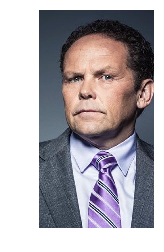

Face recognized as belonging to JOSS CARTER:


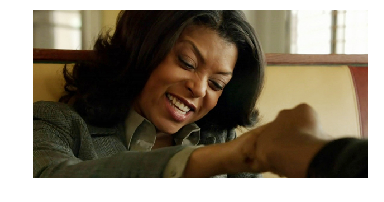

Face recognized as belonging to LIONEL FUSCO:


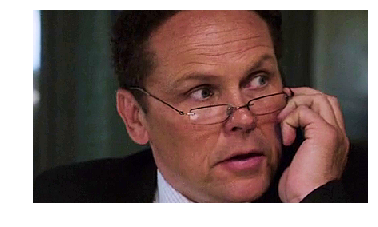

Face recognized as belonging to HAROLD FINCH:


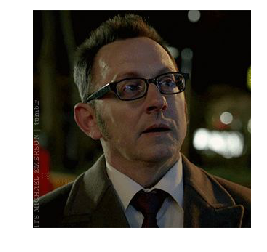

Face recognized as belonging to JOHN REESE:


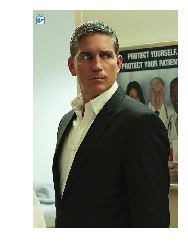

Face recognized as belonging to JOHN REESE:


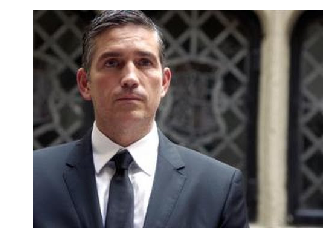

Face recognized as belonging to HAROLD FINCH:


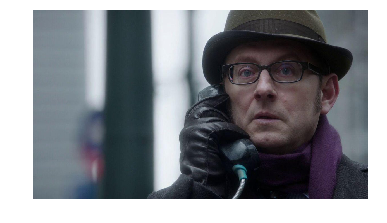

Face recognized as belonging to ROOT:


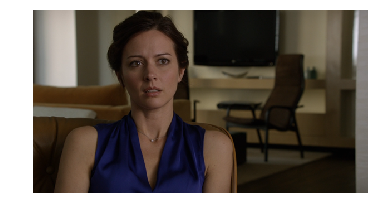

Face recognized as belonging to SAMEEN SHAW:


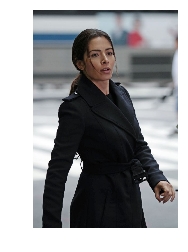

Face recognized as belonging to JOHN REESE:


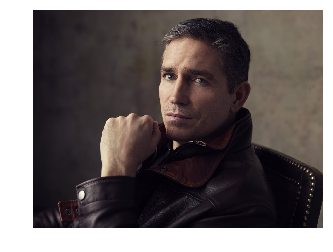

Face recognized as belonging to ROOT:


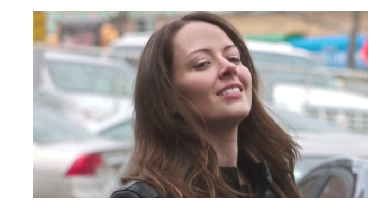

Face recognized as belonging to ROOT:


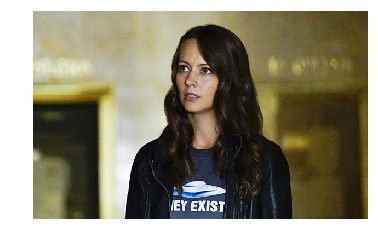

Face recognized as belonging to JOHN REESE:


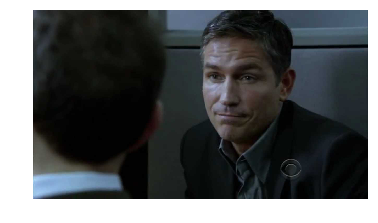

Face recognized as belonging to HAROLD FINCH:


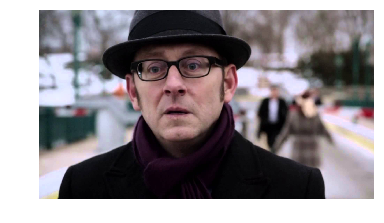

Face recognized as belonging to SAMEEN SHAW:


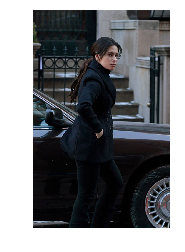

Face recognized as belonging to ROOT:


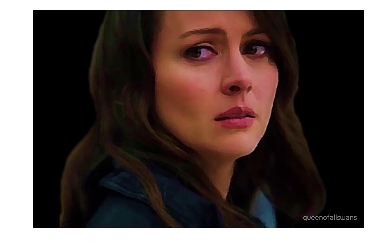

Face recognized as belonging to JOHN REESE:


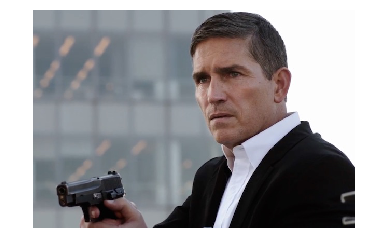

Face recognized as belonging to HAROLD FINCH:


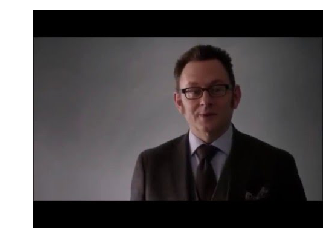

Face recognized as belonging to ROOT:


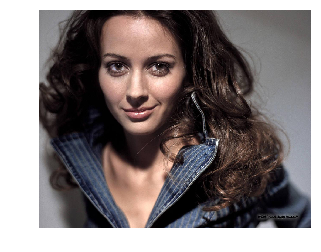

Face recognized as belonging to HAROLD FINCH:


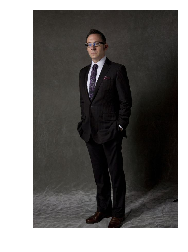

In [46]:
# Display predictions
for f, l in zip(image_test, unknown_faces):
    print "Face recognized as belonging to " + l.upper() + ":"
    img = mpimg.imread(f)
    plt.axis('off')
    plt.imshow(img)
    plt.show()

## Summing up

#### Remind the simple problems we had to solve

<img style="float:left;margin:0px 45px 0px 0px" width="55%" src="Imgs/personOfInterest.gif"/>

1. _Look at a picture and find all the faces in it_

2. _Focus on each face and be able to understand that even if a face is turned in a weird direction or in bad lighting, it is still the same person_

3. _Be able to pick out unique features of the face that you can use to tell it apart from other people_

4. _Compare the unique features of that face to all the people you already know to determine the person’s name_

#### Let’s review the steps we followed

<img style="float:right;margin:5px 0px 10px 30px" width="53%" src="Imgs/pipeline.jpg"/>

1. Encode the image via the HOG algorithm to create a simplified version of the image. Detect faces seeking for image parts that most looks like a generic HOG encoding of a face.

2. Figure out the pose of the faces by finding the main face landmarks. Use them to warp each face so that the eyes and mouth are centered.

3. Pass each centered face through a pre-trained DCNN embedding it into a 128-D space. These measuremeNts are the 128-D feature vectors linked to the faces.

4. Find matches by means of a classifier trained on faces' features measured in the past.

# <a id='What about Videos?'> What about Videos?</a>

Working with videos is all about applying the desired processing on images frame by frame.
The [OpenCV documentation](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html) provides some basics on how to get started with videos in OpenCV.

### > Python code 

Let's run face recognition on a video file and save the results to a new video file.
Simply to keep the code light, we'll use the [`face_recognition`](https://github.com/ageitgey/face_recognition) Python library to detect and encode faces. Then we'll apply the classifier saved in the previous section.

In [ ]:
# Get rid of warnings about deprecated functions
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Libraries
import numpy as np
import cv2
import face_recognition
from sklearn.externals import joblib

# Load the trained classifier
le, clf = joblib.load('models/labelEncoder_faceClassifier.pkl')

# Open the input movie file
file_name = 'Imgs/Person of Interest Season 4 Intro [HD].mp4'
input_movie = cv2.VideoCapture(file_name)
length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))

# Create an output movie file (make sure resolution/frame rate matches input video!)
fps = input_movie.get(cv2.CAP_PROP_FPS)
capSize = (int(input_movie.get(cv2.CAP_PROP_FRAME_WIDTH)), 
           int(input_movie.get(cv2.CAP_PROP_FRAME_HEIGHT)))
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
output_movie = cv2.VideoWriter('Person of Interest - FaceRecognition.mov', 
                               fourcc, fps, capSize, True)

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
frame_number = 0

# Loop on frames
while (input_movie.isOpened()):
    # Grab a single frame of video
    ret, frame = input_movie.read()
    frame_number += 1

    # Quit when the input video file ends
    if not ret:
        break

    # Convert the image from BGR color (which OpenCV uses) 
    # to RGB color (which face_recognition uses)
    rgb_frame = frame[:, :, ::-1]

    # Find all the faces and face encodings in the current frame of video
    face_locations = face_recognition.face_locations(rgb_frame)
    if len(face_locations) > 0:
        face_encodings_ = face_recognition.face_encodings(rgb_frame, face_locations)
        face_encodings = np.array(face_encodings_)
        
        # Apply the classifier to recognize faces
        face_names = map(str.upper, le.inverse_transform(clf.predict(face_encodings)))
    
        # Label the results
        for (top, right, bottom, left), name in zip(face_locations, face_names):
            if not name:
                continue
    
            # Draw a box around the face
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
    
            # Draw a label with a name below the face
            cv2.rectangle(frame, (left, bottom - 25), (right, bottom), (0, 0, 255), 
                          cv2.FILLED)
            font = cv2.FONT_ITALIC
            cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.8, (255, 255, 255), 2)
    
    # Write the resulting image to the output video file
    if frame_number % 50 == 0:
        print("Writing frame {} / {}".format(frame_number, length))
    output_movie.write(frame)

# All done!
input_movie.release()
output_movie.release()
cv2.destroyAllWindows()

<a id='DL and CNN'></a>

# Appendix — Deep Learning and ConvNets

<img width="100%" src="Imgs/imagelayer.png"/>

## Introduction

Let's start by making some terminology clear.

***Artificial Intelligence* ( AI )**, ***Machine Learning* ( ML )**, ***Deep Learning* ( DL )**: they are all buzz word these days, but what's the difference?


Generally, we use the term AI any time we have devices that perceive their environment and take actions maximizing the chance of success at some goal.
ML is a branch of AI. We talk about ML algorithms any time we want to learn from data and draw conclusions using them.
Finally, DL is a branch of ML. It is a collection of algorithms focused on modelling high-level abstractions in data by means of Artificial neural networks ( ANN ).

> Precisely, DL algorithms enable machines to draw conclusions which are totally natural for humans but extremely complex for computers.

### Deep Learning

<img style="float:right;margin:-30px 40px 0px 80px" width="30%" src="Imgs/ANN.png"/>

Deep learning ( aka *deep structured learning*, *hierarchical learning* ) is a class of ML algorithms which learn **multiple levels of features** in an unsupervised manner.

From an initial feature matrix, the model usually performs a series of transformations that move the data through so-called **hidden layers** until outputting a final prediction.

Most deep learning networks use an iterative approach, **propagating transformations forward to prediction**, then **back-propagating errors to adjust the learned parameters**.

### Artificial Neural Networks

In ML and cognitive science, an ANN is a network inspired by biological neural networks. They are used to estimate or approximate functions which can depend on a **large number of inputs that are generally unknown**.

An ANN is built from nodes ( **neurons** ) stacked in layers between the feature vector and the target vector, with **each layer feeding into the next**.


#### Single-Layer Neural Network — Perceptron structure

<img style="float:right;margin:11px 0px 100px 15px" width="48%" src="Imgs/SLNN.png"/>

Let us see how an ANN unit works.
The perceptron is an algorithm for supervised learning of binary classifiers.

The weights are being multiplied by the input vector summed up and feeded into the activation function's input. 
The **activation function** of the perceptron is a threshold function ( e.g. Heaviside function ) squashing the continuous-valued output into binary class labels for prediction.
The activation function can be any non-linear function: it defines the output of that node given a set of inputs.


#### How do we get the weights to use? 

We have to train the model as follows:

1. Initialize the weights **randomly**

2. For each input $x_i$:
   * **Forward Propagation**: Calculate the output
   * **Backward Propagation**: Update the weights in order to minimize a proper cost function

3. Each complete loop on all the inputs is called **epoch**. Iterate the step 2 for a proper number of epochs

The [**Stochastic Gradient Descent Optimization algorithm**](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) is used to learn the weights coefficients of the model.

### Deep Networks

The proper name of the just analyzed neural network is **Feed Forward Network** and it is the simplest case of NN. 
Many different kind of deep networks are available. A summary sheet follows.

<img width="100%" src="Imgs/supervisedNN.png"/>
<img width="90%" src="Imgs/unsupervisedNN.png"/>


## Convolutional Neural Network

A convolutional neural network ( CNN, or ConvNet ) is a type of **feed-forward** artificial neural network in which the connectivity pattern between its neurons is inspired by the organization of the animal visual cortex.

The networks consist of **multiple layers of small neuron collections which process portions of the input image**, called **receptive fields**. 
The outputs of these collections are then tiled so that their **input regions overlap**, to obtain a better representation of the original image.


### Structure af a ConvNet

CNNs take the image, pass it through a series of _convolutional_, _nonlinear_, _pooling ( downsampling )_, and _fully connected layers_, and get an output. 
The output can be a single class or a probability of classes that best describes the image.

<img src="Imgs/convnets_cover.png" width="70%" />

#### [ 1 ] Convolutional Layer

Convolutional layers can be thought of as **feature identifiers**: every layer acts as a filter for the presence of specific features or patterns present in the original image ( e.g. _straight edges_, _simple colors_, _curves_ ).

How so?

> See the example below. 
The light blue grid is called the **Input Feature Map** and it is the image itself at the very first layer of the network.
A **Kernel** of values, aka **convolution matrices** or **convolutional filters**, ( shaded area ) slides across the input feature map. At each location, the product between each element of the kernel and the input element it overlaps is computed and the results are summed up to obtain the output in the current location.
The final output ( the green grid ) of this procedure is called **Output Feature Map**.

> <img src="Imgs/full_padding_no_strides_transposed.gif" width="20%" />
The convolution depicted in the animation above is an instance of a **2-D convolution**, but it can be generalized to **N-D convolutions**. Indeed, to keep the drawing simple, a single input feature map is represented, but it is not uncommon to have multiple feature maps stacked one onto another. That's the case of RGB images. If so, a **N-D convolution** is needed, where N is the number of channels, i.e. the number of stacked input feature maps. In case of RGB images, N is equal to 3 and the kernel would be a _cuboid_ and would slide across the height, width and depth of the input feature map. Note that the output feature map is a 2-D matrix even in these cases, because each element-wise product is summed up into one scalar number.

Let's visualize this concept.

<img src="Imgs/cnn3.png" width="60%" />
<img src="Imgs/cnn4.png" width="60%" />
<img src="Imgs/cnn5.png" width="80%" />
<img src="Imgs/cnn6.png" width="80%" />

In case of the second example of receptive field, the **activation value** is much lower! This is because there wasn’t anything in the image section that responded to the curve detector filter.

Actually, **each convolutional layer can be built so that it identifies multiple features**. The number of identified features is defined by the number of used filters, i.e. used convolutional matrices. If K different filters are used, then the output feature matrix will have the depth dimension equal to K.

<img style="margin:20px 0px 15px 140px" src="Imgs/ConvNet.jpg" width="70%" />

A ConvNet is basically a deep network where we have stacks of convolutions. 
The general idea is that they will form a pyramid. The convolutions progressively squeeze the spatial dimension, while increasing the depth, which corresponds roughly to the complexity of the output representation.

#### [ 2 ] Non-linear Layer

After each conv layer, it is convention to apply a _non-linear layer_ ( or **activation layer** ) immediately afterward.

The purpose of this layer is to introduce non-linearity to a system that basically has just been computing linear operations during the conv layers ( just element-wise multiplications and summations ).

Researchers found out that **ReLU ( Rectified Linear Units ) layers** work far better because the network is able to _train a lot faster_ ( because of the computational efficiency ) without making a significant difference to the accuracy.

#### [ 3 ] Pooling (Down-sampling) Layer

Pooling operations **reduce the size of feature maps** by using some function to summarize subregions, such as taking the average or the maximum value.

Pooling works by sliding a window across the input and feeding the content of the window to a _pooling function_. In some sense, pooling works very much like a discrete convolution, but replaces the linear combination described by the kernel with some other function ( e.g. _average_, _max_, _L-2 norm_ ).

Example of a MaxPooling filter:
<img src="Imgs/MaxPool.png" width="50%" />

The intuition behind this Pooling layer is that once we know that a specific feature is in the original input volume ( _there will be a high activation value_ ), its exact location is not as important as its relative location to the other features.

This serves two main purposes: 
* Drastically reduces the spatial dimension ( the length and the width but not the depth ) of the input volume, and so reduce the amount of parameters.
* Controlling overfitting.

#### [ 4 ] Drop-out Layer

The **dropout layers** have the very specific function to *drop out* a random set of activations in that layers by setting them to zero in the forward pass.

* It allows to **avoid overfitting**,
* but has to be used **only at training** time and not at test time.

In other words, Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

#### [ 5 ] Fully Connected Layer

* A FC layer looks at what high level features most strongly correlate to a particular class.
* It has particular weights so that when you compute the products between the weights and the previous layer, you get the correct probabilities for the different classes.